In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
file_should_can = r"C:\Scriptie\results retreiver\CAN_SHOULD\can-should\should_can all queries.xlsx"
file_should_only= r"C:\Scriptie\results retreiver\CAN_SHOULD\should only\only should basic.xlsx"

In [4]:
xls_should_can = pd.ExcelFile(file_should_can)
xls_should_rephrased = pd.ExcelFile(file_should_only)

# Display sheet names to understand the structure
xls_should_can.sheet_names, xls_should_rephrased.sheet_names

(['Blad1', 'test'], ['Sheet1'])

In [5]:
df_should_can = pd.read_excel(xls_should_can, sheet_name="Blad1")
df_should_only = pd.read_excel(xls_should_rephrased, sheet_name="Sheet1")

In [6]:
df_should_can.head()

,Original_query,query_id,@n,precision_dense,recall_dense,f1_dense,precision_sparse,recall_sparse,f1_sparse,precision_combined,recall_combined,f1_combined
0,How can I monitor and report energy consumptio...,Monitoring and reporting energy consumption tr...,5,1.0,0.125,0.222222,0.6,0.075,0.133333,0.6,0.075,0.133333
1,How can I monitor and report energy consumptio...,Monitor and report energy consumption trends: ...,5,1.0,0.125,0.222222,0.8,0.100,0.177778,0.8,0.100,0.177778
2,How can I monitor and report energy consumptio...,"""Methods to monitor and report energy consumpt...",5,1.0,0.125,0.222222,0.6,0.075,0.133333,0.6,0.075,0.133333
3,How can I monitor and report energy consumptio...,"""Monitoring and reporting energy consumption t...",5,1.0,0.125,0.222222,0.8,0.100,0.177778,0.8,0.100,0.177778
4,How can I monitor and report energy consumptio...,Monitoring and reporting energy consumption tr...,10,0.9,0.225,0.360000,0.7,0.175,0.280000,0.7,0.175,0.280000


In [7]:
df_should_only.head()

,Original_query,query_id,@n,precision_dense,recall_dense,f1_dense,precision_sparse,recall_sparse,f1_sparse,precision_combined,recall_combined,f1_combined
0,How can I monitor and report energy consumptio...,Monitoring and reporting energy consumption tr...,5,0.8,0.190476,0.307692,0.4,0.095238,0.153846,0.4,0.095238,0.153846
1,How can I monitor and report energy consumptio...,Monitor and report energy consumption trends: ...,5,1.0,0.238095,0.384615,0.8,0.190476,0.307692,0.8,0.190476,0.307692
2,How can I monitor and report energy consumptio...,"""Methods to monitor and report energy consumpt...",5,1.0,0.238095,0.384615,0.6,0.142857,0.230769,0.6,0.142857,0.230769
3,How can I monitor and report energy consumptio...,"""Monitoring and reporting energy consumption t...",5,0.8,0.190476,0.307692,0.8,0.190476,0.307692,0.6,0.142857,0.230769
4,How can I monitor and report energy consumptio...,Monitoring and reporting energy consumption tr...,10,0.8,0.380952,0.516129,0.4,0.190476,0.258065,0.6,0.285714,0.387097


In [8]:
print(df_should_only.dtypes)
print(df_should_can.dtypes)


Original_query         object
query_id               object
@n                      int64
precision_dense       float64
recall_dense          float64
f1_dense              float64
precision_sparse      float64
recall_sparse         float64
f1_sparse             float64
precision_combined    float64
recall_combined       float64
f1_combined           float64
dtype: object
Original_query         object
query_id               object
@n                      int64
precision_dense       float64
recall_dense          float64
f1_dense              float64
precision_sparse      float64
recall_sparse         float64
f1_sparse             float64
precision_combined    float64
recall_combined       float64
f1_combined           float64
dtype: object


In [9]:
import matplotlib.pyplot as plt

# Extract relevant columns
n_values = df_should_only['@n'].unique()
queries = df_should_only['Original_query'].unique()
print(n_values)
print(queries)

[ 5 10 15 20 25 30]
['How can I monitor and report energy consumption trends over time'
 'How can I reduce cooling costs without breaking compliance?'
 'How do I upgrade an existing data center for better energy efficiency?'
 'What are the first steps in designing a new energy-efficient data center?'
 'What are the risks of retrofitting an older data center?']


In [10]:
df_grouped = df_should_can.groupby(['Original_query', '@n']).mean(numeric_only=True).reset_index()

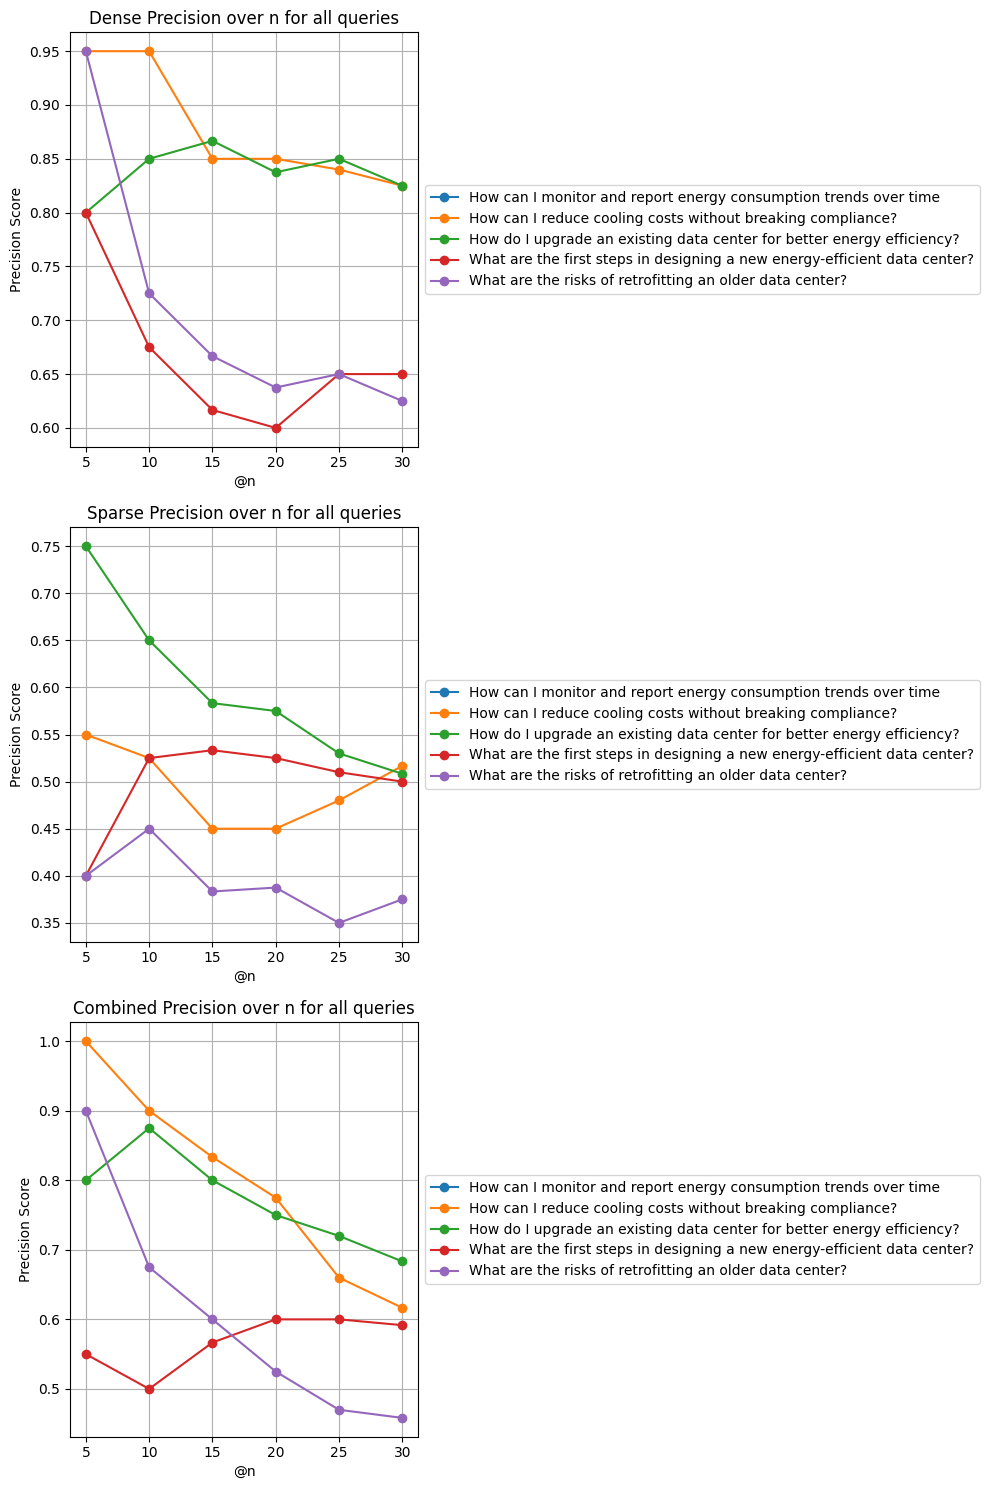

In [11]:


# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot Dense Precision
for query in queries:
    subset = df_grouped[df_grouped['Original_query'] == query]
    axes[0].plot(subset['@n'], subset['precision_dense'], marker='o', linestyle='-', label=query)
axes[0].set_title('Dense Precision over n for all queries')
axes[0].set_xlabel('@n')
axes[0].set_ylabel('Precision Score')
axes[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axes[0].grid(True)

# Plot Sparse Precision
for query in queries:
    subset = df_grouped[df_grouped['Original_query'] == query]
    axes[1].plot(subset['@n'], subset['precision_sparse'], marker='o', linestyle='-', label=query)
axes[1].set_title('Sparse Precision over n for all queries')
axes[1].set_xlabel('@n')
axes[1].set_ylabel('Precision Score')
axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axes[1].grid(True)

# Plot Combined Precision
for query in queries:
    subset = df_grouped[df_grouped['Original_query'] == query]
    axes[2].plot(subset['@n'], subset['precision_combined'], marker='o', linestyle='-', label=query)
axes[2].set_title('Combined Precision over n for all queries')
axes[2].set_xlabel('@n')
axes[2].set_ylabel('Precision Score')
axes[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axes[2].grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


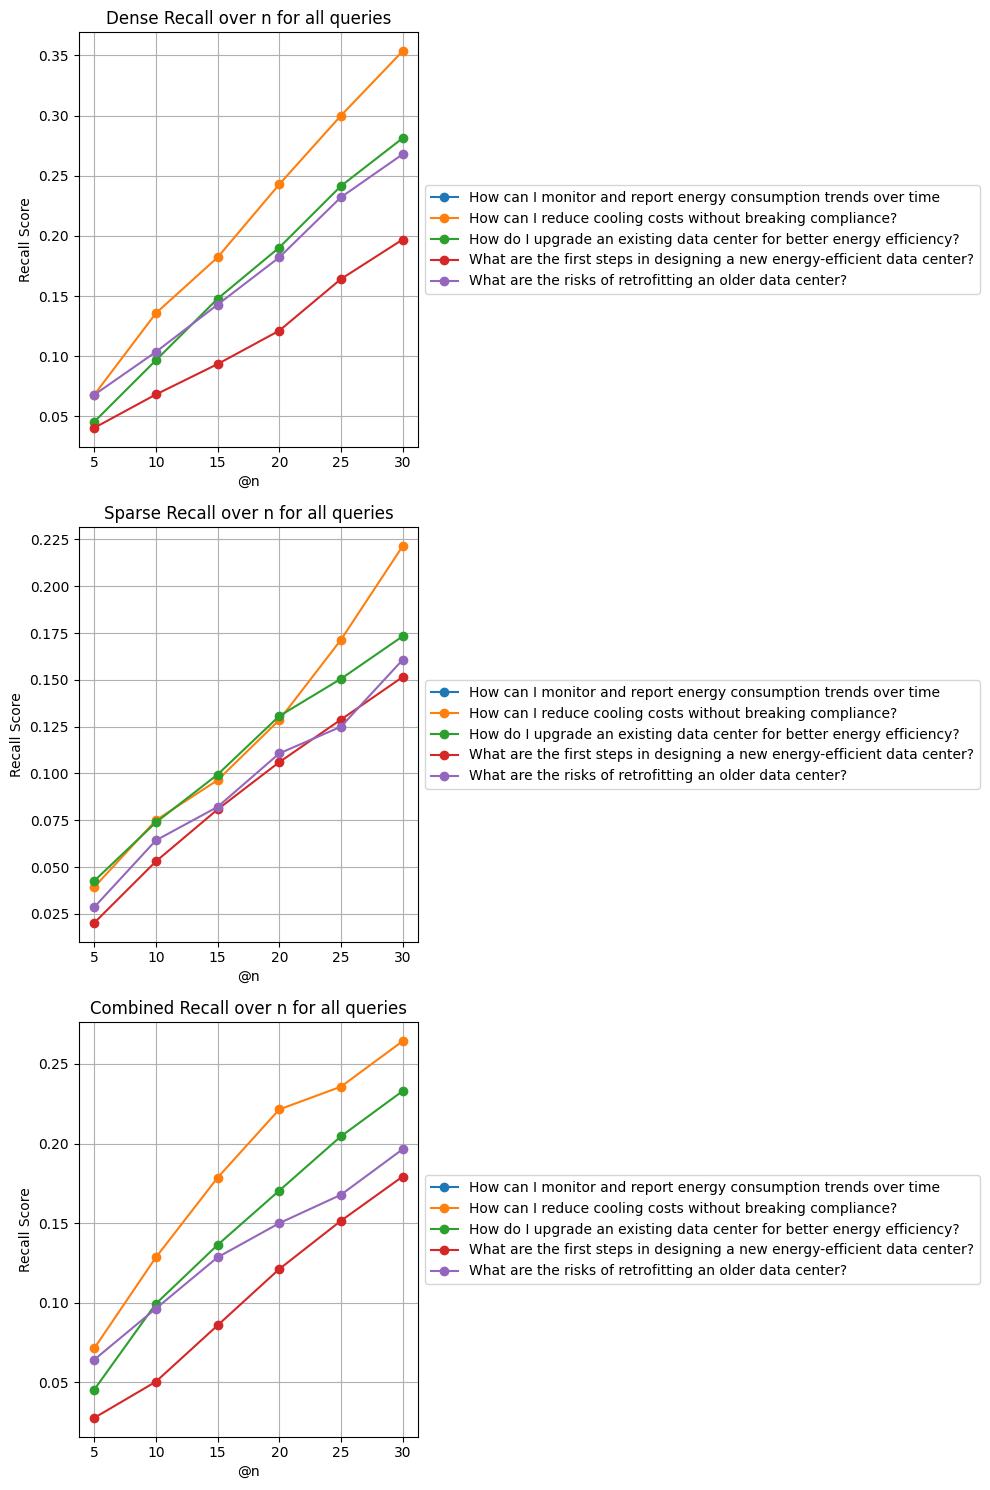

In [12]:
# Create subplots for recall metrics
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot Dense Recall
for query in queries:
    subset = df_grouped[df_grouped['Original_query'] == query]
    axes[0].plot(subset['@n'], subset['recall_dense'], marker='o', linestyle='-', label=query)
axes[0].set_title('Dense Recall over n for all queries')
axes[0].set_xlabel('@n')
axes[0].set_ylabel('Recall Score')
axes[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axes[0].grid(True)

# Plot Sparse Recall
for query in queries:
    subset = df_grouped[df_grouped['Original_query'] == query]
    axes[1].plot(subset['@n'], subset['recall_sparse'], marker='o', linestyle='-', label=query)
axes[1].set_title('Sparse Recall over n for all queries')
axes[1].set_xlabel('@n')
axes[1].set_ylabel('Recall Score')
axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axes[1].grid(True)

# Plot Combined Recall
for query in queries:
    subset = df_grouped[df_grouped['Original_query'] == query]
    axes[2].plot(subset['@n'], subset['recall_combined'], marker='o', linestyle='-', label=query)
axes[2].set_title('Combined Recall over n for all queries')
axes[2].set_xlabel('@n')
axes[2].set_ylabel('Recall Score')
axes[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axes[2].grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

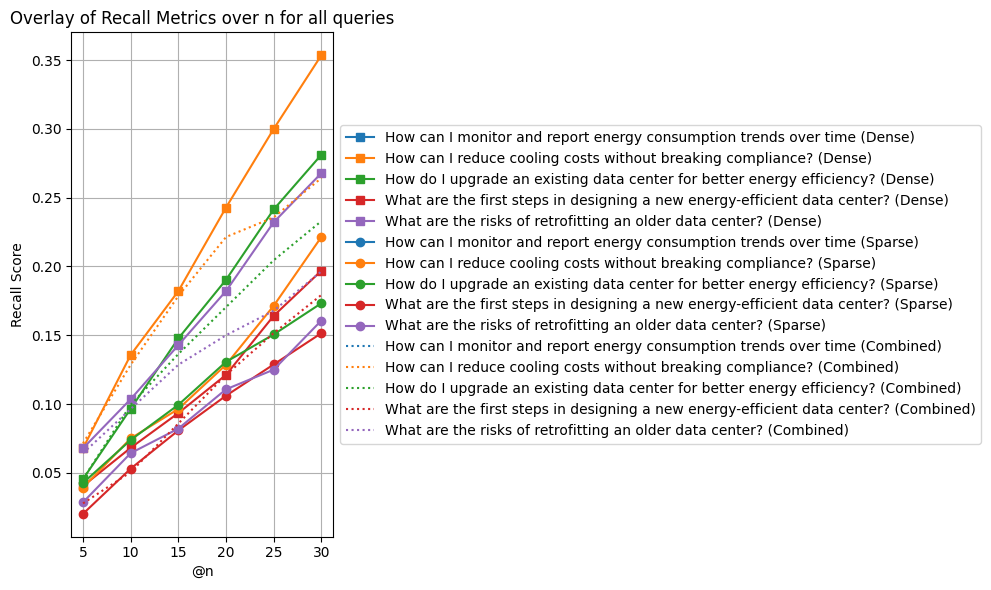

In [13]:
# Define colors for each query to maintain consistency across the three recall types
query_colors = {
    query: color for query, color in zip(queries, plt.cm.tab10.colors[:len(queries)])
}

# Create a single plot overlaying all recall metrics with consistent colors
plt.figure(figsize=(10, 6))

# Plot Dense Recall with squares
for query in queries:
    subset = df_grouped[df_grouped['Original_query'] == query]
    plt.plot(subset['@n'], subset['recall_dense'], marker='s', linestyle='-', color=query_colors[query], label=f"{query} (Dense)")

# Plot Sparse Recall with circles
for query in queries:
    subset = df_grouped[df_grouped['Original_query'] == query]
    plt.plot(subset['@n'], subset['recall_sparse'], marker='o', linestyle='-', color=query_colors[query], label=f"{query} (Sparse)")

# Plot Combined Recall with dotted line
for query in queries:
    subset = df_grouped[df_grouped['Original_query'] == query]
    plt.plot(subset['@n'], subset['recall_combined'], linestyle='dotted', color=query_colors[query], label=f"{query} (Combined)")

# Title and labels
plt.title('Overlay of Recall Metrics over n for all queries')
plt.xlabel('@n')
plt.ylabel('Recall Score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

C:\Users\quint\AppData\Local\Temp\ipykernel_81560\3610774494.py:27: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


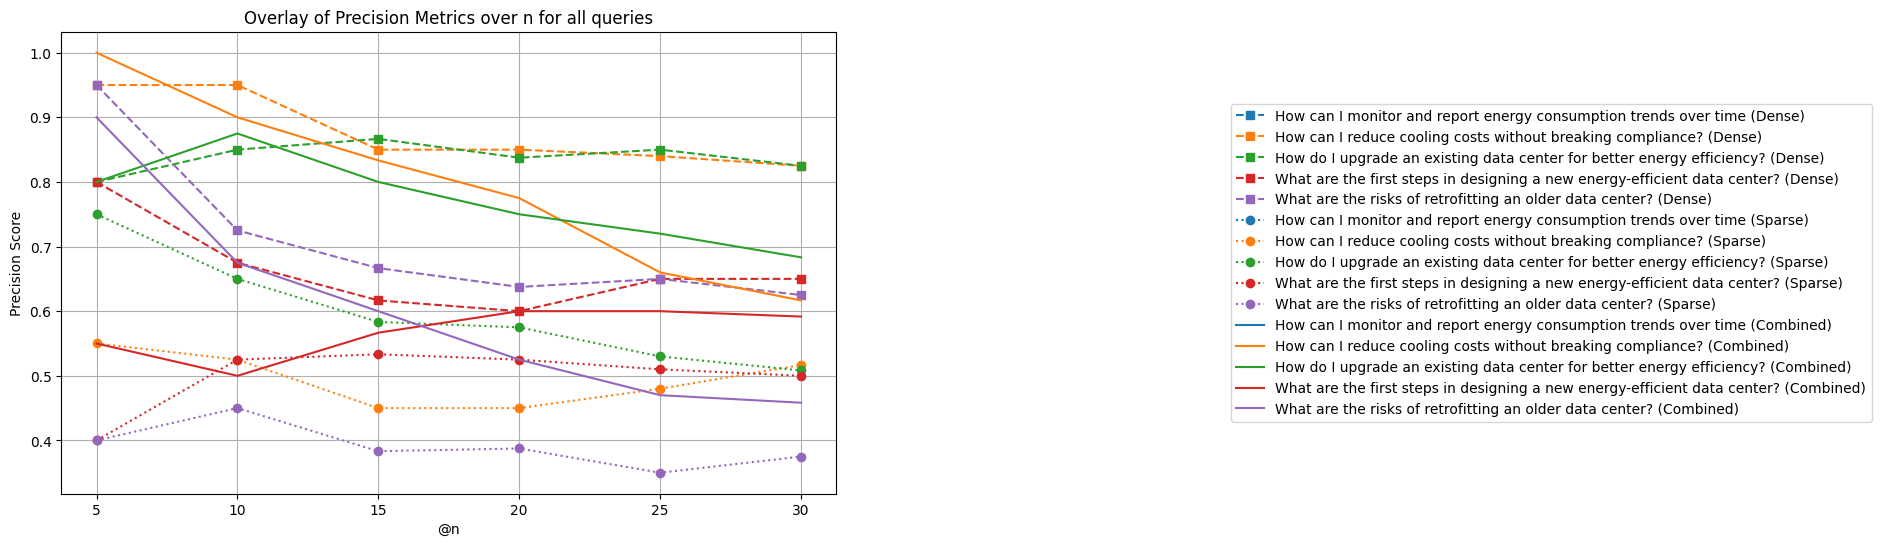

In [14]:
# Create a single plot overlaying all precision metrics with consistent colors
plt.figure(figsize=(10, 6))

# Plot Dense Precision with squares
for query in queries:
    subset = df_grouped[df_grouped['Original_query'] == query]
    plt.plot(subset['@n'], subset['precision_dense'], marker='s', linestyle='dashed', color=query_colors[query], label=f"{query} (Dense)")

# Plot Sparse Precision with circles
for query in queries:
    subset = df_grouped[df_grouped['Original_query'] == query]
    plt.plot(subset['@n'], subset['precision_sparse'], marker='o', linestyle='dotted', color=query_colors[query], label=f"{query} (Sparse)")

# Plot Combined Precision with dotted line
for query in queries:
    subset = df_grouped[df_grouped['Original_query'] == query]
    plt.plot(subset['@n'], subset['precision_combined'], linestyle='-', color=query_colors[query], label=f"{query} (Combined)")

# Title and labels
plt.title('Overlay of Precision Metrics over n for all queries')
plt.xlabel('@n')
plt.ylabel('Precision Score')
plt.legend(loc='center left', bbox_to_anchor=(1.5, 0.5))
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

C:\Users\quint\AppData\Local\Temp\ipykernel_81560\1403428721.py:27: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


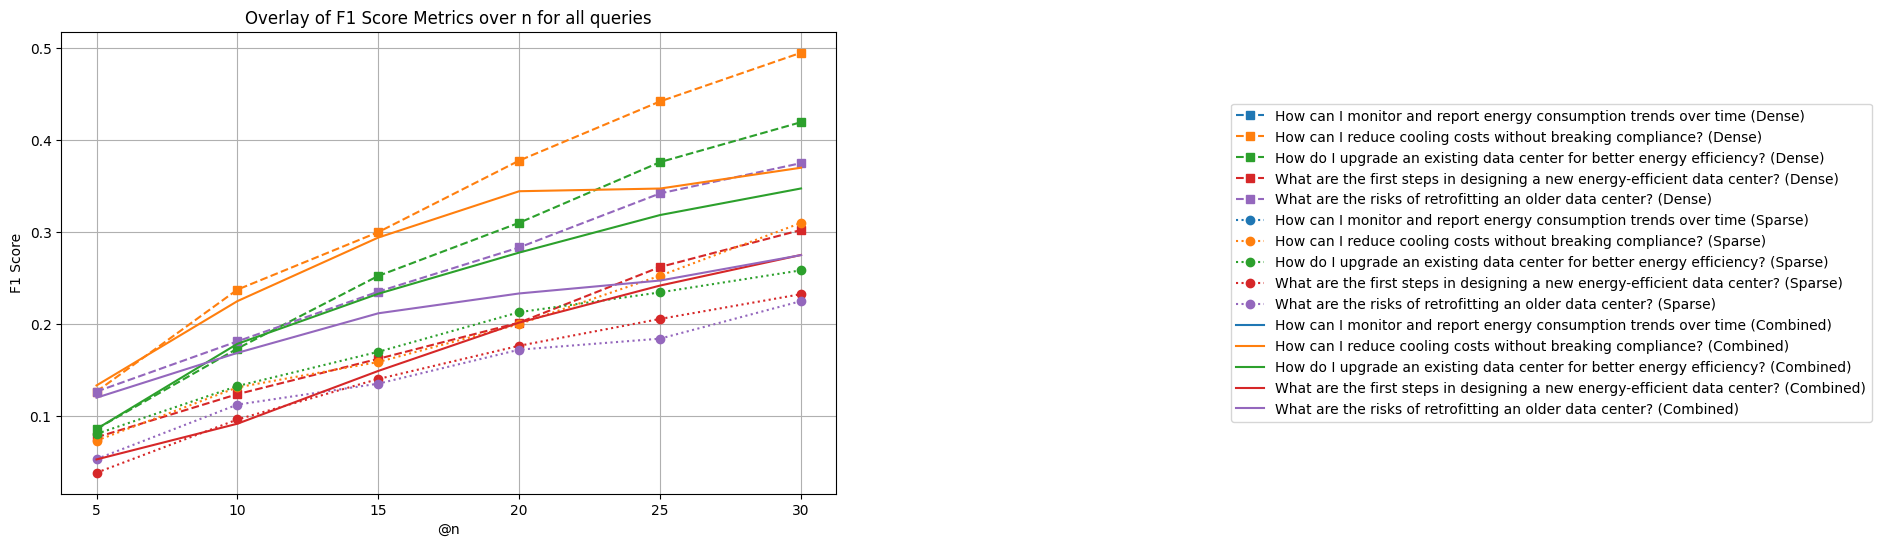

In [15]:
# Create a single plot overlaying all F1-score metrics with consistent colors
plt.figure(figsize=(10, 6))

# Plot Dense F1-score with squares
for query in queries:
    subset = df_grouped[df_grouped['Original_query'] == query]
    plt.plot(subset['@n'], subset['f1_dense'], marker='s', linestyle='dashed', color=query_colors[query], label=f"{query} (Dense)")

# Plot Sparse F1-score with circles
for query in queries:
    subset = df_grouped[df_grouped['Original_query'] == query]
    plt.plot(subset['@n'], subset['f1_sparse'], marker='o', linestyle=':', color=query_colors[query], label=f"{query} (Sparse)")

# Plot Combined F1-score with dotted line
for query in queries:
    subset = df_grouped[df_grouped['Original_query'] == query]
    plt.plot(subset['@n'], subset['f1_combined'], linestyle='-', color=query_colors[query], label=f"{query} (Combined)")

# Title and labels
plt.title('Overlay of F1 Score Metrics over n for all queries')
plt.xlabel('@n')
plt.ylabel('F1 Score')
plt.legend(loc='center left', bbox_to_anchor=(1.5, 0.5))
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

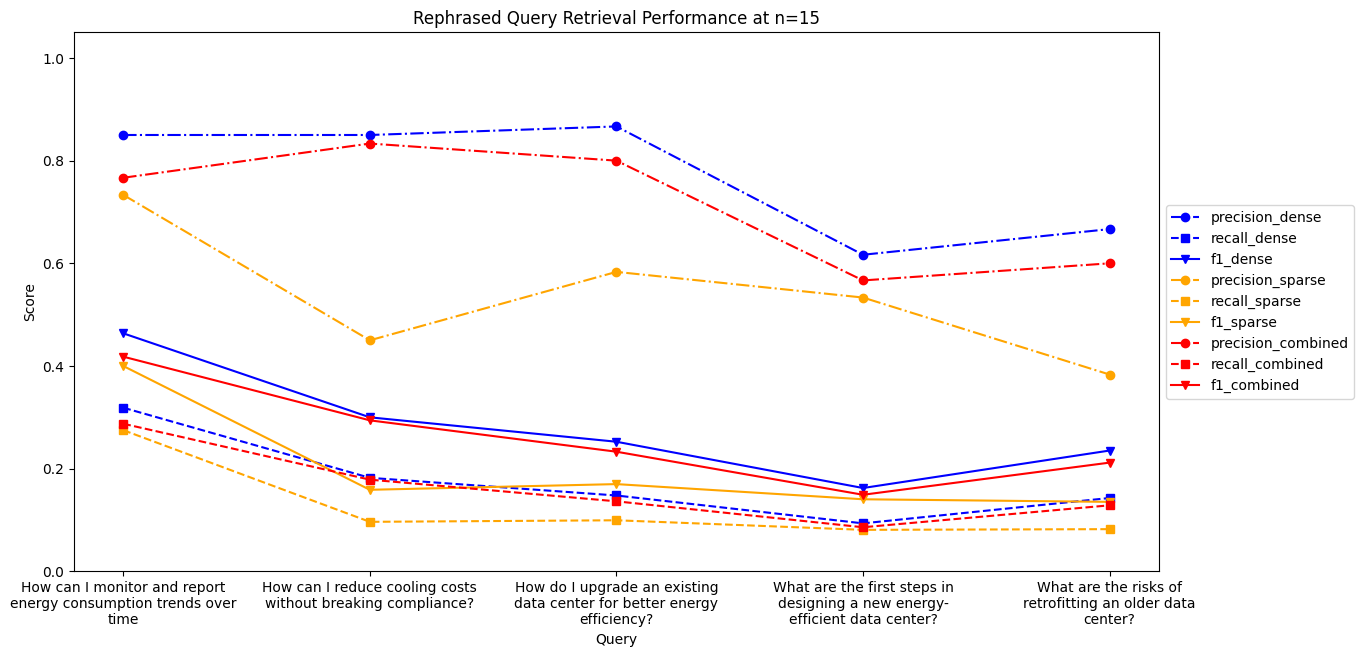

In [16]:
import textwrap

df_n15 = df_grouped[df_grouped['@n'] == 15].groupby('Original_query').mean(numeric_only=True).reset_index()


# Define line styles based on metric type

colors = {
    "precision_dense": "blue", "recall_dense": "blue", "f1_dense": "blue",
    "precision_sparse": "orange", "recall_sparse": "orange", "f1_sparse": "orange",
    "precision_combined": "red", "recall_combined": "red", "f1_combined": "red"
}

linestyles = {
    "precision_dense": "-.", "precision_sparse": "-.", "precision_combined": "-.",
    "recall_dense": "--", "recall_sparse": "--", "recall_combined": "--",
    "f1_dense": "-", "f1_sparse": "-", "f1_combined": "-"
}

# Define marker mapping for precision, recall, and F1 categories
markers = {
    "precision_dense": "o", "precision_sparse": "o", "precision_combined": "o",
    "recall_dense": "s", "recall_sparse": "s", "recall_combined": "s",
    "f1_dense": "v", "f1_sparse": "v", "f1_combined": "v"
    }
    
    # Select relevant metrics for visualization
metrics = ["precision_dense", "recall_dense", "f1_dense", 
           "precision_sparse", "recall_sparse", "f1_sparse", 
           "precision_combined", "recall_combined", "f1_combined"]

# Wrap labels for better readability
wrapped_labels = [textwrap.fill(label, width=30) for label in queries]  
# Plot each metric with updated marker, color, and line style scheme
plt.figure(figsize=(14, 7))
for metric in metrics:
    plt.plot(wrapped_labels, df_n15[metric], marker=markers[metric], linestyle=linestyles[metric],
             color=colors[metric], label=metric)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha="center") 
# plt.xticks(rotation=45, ha="right")
plt.ylabel("Score")
plt.xlabel("Query")
plt.title("Rephrased Query Retrieval Performance at n=15")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.grid()
plt.ylim(0, 1.05)
# Show the plot
plt.show()